In [1]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(

    min_delta=0.001, # min d/de which can be considered an improvement
    patience=20,
    restore_best_weights=True
    
)



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
red_wine = pd.read_csv("./red-wine.csv")
# looking for quality.

y = red_wine.quality
X = red_wine.drop(["quality"], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 0)

max_ = X_train.max(axis=0)
min_ = X_valid.max(axis=0)

X_train = (X_train - min_ )/ (max_ - min_)
X_valid = (X_valid - min_ )/ (max_ - min_)

X_train.shape

(1119, 11)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

model = keras.Sequential([

    keras.Input(shape=[11]),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1)
    
])

model.compile(
    optimizer="adam",
    loss="mae"
)

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=256, epochs=500, 
                    callbacks=[early_stopping],
                    verbose=0 )

In [18]:
history_df = pd.DataFrame(history.history)

<Axes: >

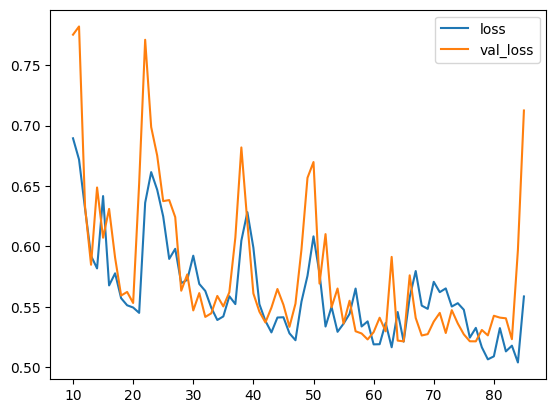

In [26]:
history_df.loc[10:, ["loss", "val_loss"]].plot()